In [22]:
import csv
import numpy as np

import os
import sys 
import time
import csv

directory = os.getcwd()
parent_path = os.path.dirname(directory) # # Getting the parent directory name where the current directory is present.
sys.path.append(parent_path)  # # setting path... # equialent to  sys.path.append('../')

nfft=64

In [23]:
# function to read the reconstruction errrors from CSV file that was generated using the file "parallelized_network_q_list_fixed_freq_correlated_noise.py" or similar one
# stores the avg error to rec_error_avg
def reconstruction_error(num_nodes,max_in_degree,nfft,nTraj,conti_samp,file_loc=None):
    if file_loc==None:
        file_loc=directory+"/error_data"
    if conti_samp==0:
        file_name=file_loc+"/rec_error_RR_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"
    else:
        file_name=file_loc+"/rec_error_conti_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"

    with open(file_name, 'r', newline='\n') as csvfile:
        csvreader=csv.reader(csvfile, delimiter=',')
        rows=list()
        for lines in csvreader:
            rows.append(lines)
    omega=[float(i) for i in rows[0]]
    Samples=[int(i) for i in rows[len(rows)-1]]
    nNetworks=int(rows[1][1])
    avg_error=np.zeros([nNetworks,len(Samples)])
    for ind1 in range(3,3+nNetworks):
        avg_error[ind1-3,:]=[float(i) for i in rows[ind1]]
    rec_error_avg=np.sum(avg_error/nNetworks,0)
    
    return rec_error_avg,avg_error

In [28]:
# function to read the graph detection from CSV file that was generated using the file "parallelized_network_q_list_fixed_freq_correlated_noise.py" or similar one
# For each network and each sample_size, 1(0) is stored in the csv file to denote that the graph has been reconstructed exactly (or not).
# prob_det is calculated using sum(G=G_hat)/nNetworks
# conti_samp=1(0) denote continuous sampling (restart and record sampling)
# correlated_noise=1(0) denote temporally-correlated(i.i.d.) noise

def probability_of_correct_detection(num_nodes,max_in_degree,nfft,nTraj,correlated_noise,conti_samp,file_loc=None):
    if file_loc==None:
        file_loc=directory+"/error_data"
    if conti_samp==0 and correlated_noise==0:
        file_name=file_loc+"/prob_error_RR_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"
    elif conti_samp==1 and correlated_noise==0:
        file_name=file_loc+"/prob_error_conti_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"
    elif conti_samp==0 and correlated_noise==1:
        file_name=file_loc+"/prob_error_corre_RR_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"
    elif conti_samp==1 and correlated_noise==1:
        file_name=file_loc+"/prob_error_corre_conti_p="+str(num_nodes)+"_q="+str(max_in_degree)+"_nfft="+str(nfft)+"_nTraj="+str(nTraj)+".csv"

    with open(file_name, 'r', newline='\n') as csvfile:
        csvreader=csv.reader(csvfile, delimiter=',')
        rows=list()
        for lines in csvreader:
            rows.append(lines)
            
#     reads DFT frequency points
    omega=[float(i) for i in rows[0]]
#     reads samples list from the csv file
    Samples=[int(i) for i in rows[len(rows)-1]]
    nNetworks=int(rows[1][1])
    detection=np.zeros([nNetworks,len(Samples)])
    for ind1 in range(3,3+nNetworks):
        detection[ind1-3,:]=[float(i) for i in rows[ind1]]
    prob_det=np.sum(detection/nNetworks,0)
    return prob_det,Samples

In [32]:
prob_det_RR1,samples =probability_of_correct_detection(10,2,64,7*10**4,conti_samp=0,correlated_noise=0)
prob_det_RR2,samples =probability_of_correct_detection(10,3,64,7*10**4,conti_samp=0,correlated_noise=0)
prob_det_RR3,samples =probability_of_correct_detection(20,2,64,7*10**4,conti_samp=0,correlated_noise=0)
prob_det_RR4,samples =probability_of_correct_detection(20,3,64,7*10**4,conti_samp=0,correlated_noise=0)
prob_det_RR5,samples =probability_of_correct_detection(30,2,64,7*10**4,conti_samp=0,correlated_noise=0)
prob_det_RR6,samples =probability_of_correct_detection(30,3,64,7*10**4,conti_samp=0,correlated_noise=0)


prob_det_conti1,samples =probability_of_correct_detection(10,2,64,10**5,conti_samp=1,correlated_noise=0)
prob_det_conti2,samples =probability_of_correct_detection(10,3,64,10**5,conti_samp=1,correlated_noise=0)
prob_det_conti3,samples =probability_of_correct_detection(20,2,64,10**5,conti_samp=1,correlated_noise=0)
prob_det_conti4,samples =probability_of_correct_detection(20,3,64,10**5,conti_samp=1,correlated_noise=0)
prob_det_conti5,samples=probability_of_correct_detection(30,2,64,10**5,conti_samp=1,correlated_noise=0)
prob_det_conti6,samples=probability_of_correct_detection(30,3,64,10**5,conti_samp=1,correlated_noise=0)

prob_det_corre_RR1,samples=probability_of_correct_detection(10,2,64,7*10**4,conti_samp=0,correlated_noise=1)
prob_det_corre_RR2,samples=probability_of_correct_detection(10,3,64,7*10**4,conti_samp=0,correlated_noise=1)
prob_det_corre_RR3,samples=probability_of_correct_detection(20,2,64,7*10**4,conti_samp=0,correlated_noise=1)
prob_det_corre_RR4,samples=probability_of_correct_detection(20,3,64,7*10**4,conti_samp=0,correlated_noise=1)
prob_det_corre_RR5,samples=probability_of_correct_detection(30,2,64,7*10**4,conti_samp=0,correlated_noise=1)
prob_det_corre_RR6,samples=probability_of_correct_detection(30,3,64,7*10**4,conti_samp=0,correlated_noise=1)

prob_det_corre1,samples=probability_of_correct_detection(10,2,64,10**5,conti_samp=1,correlated_noise=1)
prob_det_corre2,samples=probability_of_correct_detection(10,3,64,10**5,conti_samp=1,correlated_noise=1)
# prob_det11,samples=probability_of_correct_detection(15,2,64,10**5,conti_samp=1,correlated_noise=1)
# prob_det12,samples=probability_of_correct_detection(15,3,64,10**5,conti_samp=1,correlated_noise=1)
prob_det_corre3,samples=probability_of_correct_detection(20,2,64,10**5,conti_samp=1,correlated_noise=1)
prob_det_corre4,samples=probability_of_correct_detection(20,3,64,10**5,conti_samp=1,correlated_noise=1)
# prob_det6,samples=probability_of_correct_detection(25,3,64,10**5,conti_samp=1,correlated_noise=0)
# prob_det_corre5,samples=probability_of_correct_detection(30,2,64,10**5,conti_samp=1,correlated_noise=1)
prob_det_corre6,samples=probability_of_correct_detection(30,3,64,10**5,conti_samp=1,correlated_noise=1)


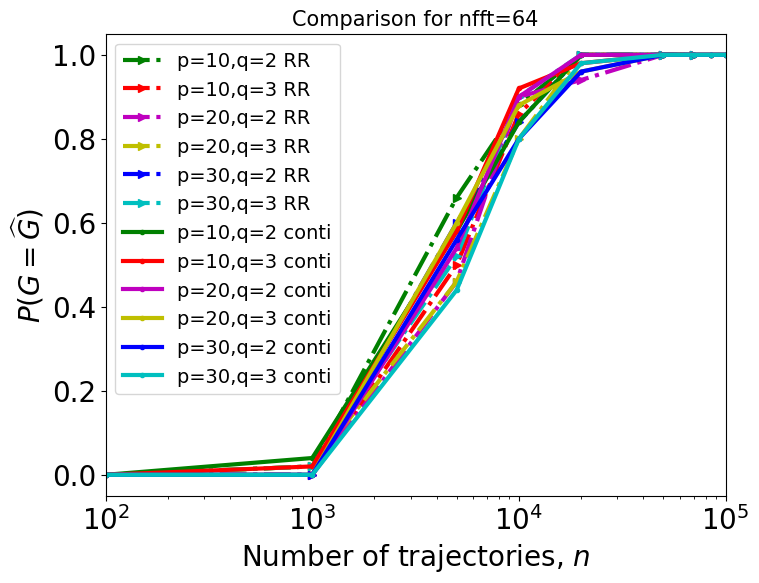

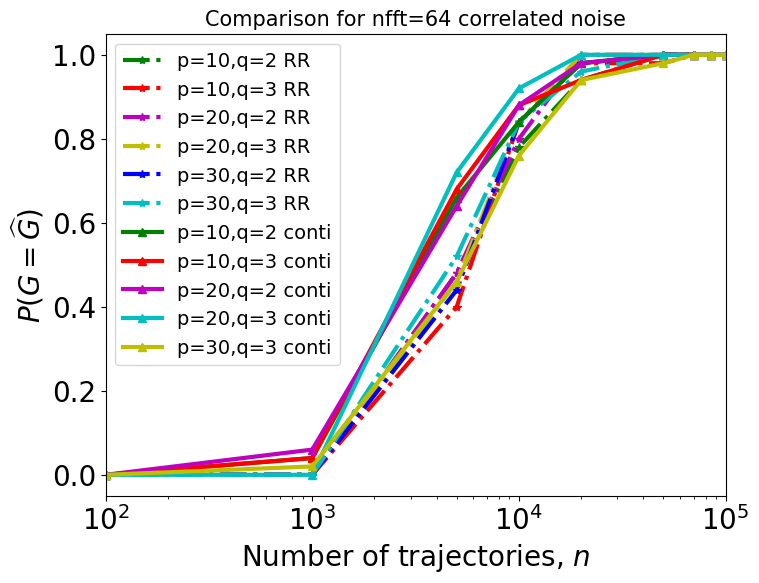

In [30]:
# plotting the data
import matplotlib.pyplot as plt
# plt.style.use('default')
plt.style.use('seaborn-v0_8-colorblind')
FONTSIZE=20
WIDTH_SIZE=8
HEIGHT_SIZE=6
LEGENDSIZE=14
LINEWIDTH=3

plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))

plt.semilogx(samples[:8],prob_det_RR1,'g>-.',label="p=10,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR2,'r>-.',label="p=10,q=3 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR3,'m>-.',label="p=20,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR4,'y>-.',label="p=20,q=3 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR5,'b>-.',label="p=30,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR6,'c>-.',label="p=30,q=3 RR",linewidth=LINEWIDTH)


plt.semilogx(samples,prob_det_conti1,'g.-',label="p=10,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti2,'r.-',label="p=10,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti3,'m.-',label="p=20,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti4,'y.-',label="p=20,q=3 conti",linewidth=LINEWIDTH)
# plt.semilogx(samples,prob_det_conti7,'co-',label="p=25,q=3 conti")
plt.semilogx(samples,prob_det_conti5,'b.-',label="p=30,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti6,'c.-',label="p=30,q=3 conti",linewidth=LINEWIDTH)
plt.legend(loc="upper left", fontsize=LEGENDSIZE)
plt.title("Comparison for nfft="+str(nfft), fontsize=15)
plt.xlabel(r"Number of trajectories, $n$",fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.xlim(100,100000)
plt.ylabel(r"$P(G=\widehat{G}$)", fontsize=FONTSIZE)
plt.savefig('comparison_plot_iid_noise.pdf',format='pdf')

plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.semilogx(samples[:8],prob_det_corre_RR1,'g*-.',label="p=10,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR2,'r*-.',label="p=10,q=3 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR3,'m*-.',label="p=20,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR4,'y*-.',label="p=20,q=3 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR5,'b*-.',label="p=30,q=2 RR",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR6,'c*-.',label="p=30,q=3 RR",linewidth=LINEWIDTH)


plt.semilogx(samples,prob_det_corre1,'g^-',label="p=10,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre2,'r^-',label="p=10,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre3,'m^-',label="p=20,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre4,'c^-',label="p=20,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre6,'y^-',label="p=30,q=3 conti",linewidth=LINEWIDTH)
plt.legend(loc="upper left", fontsize=LEGENDSIZE)
plt.title("Comparison for nfft="+str(nfft)+" correlated noise", fontsize=15)
plt.xlabel(r"Number of trajectories, $n$", fontsize=FONTSIZE)
plt.xlim(100,100000)
plt.ylabel(r"$P(G=\widehat{G}$)", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.savefig('comparison_plot_correlated_noise.pdf',format='pdf')


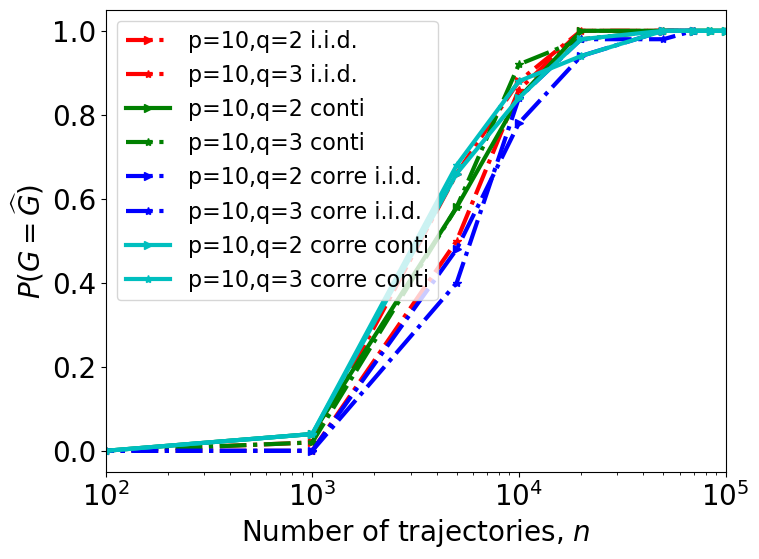

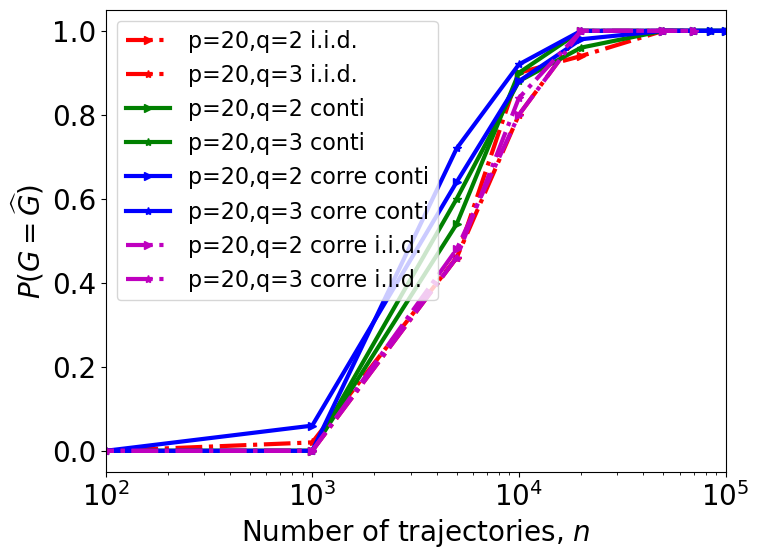

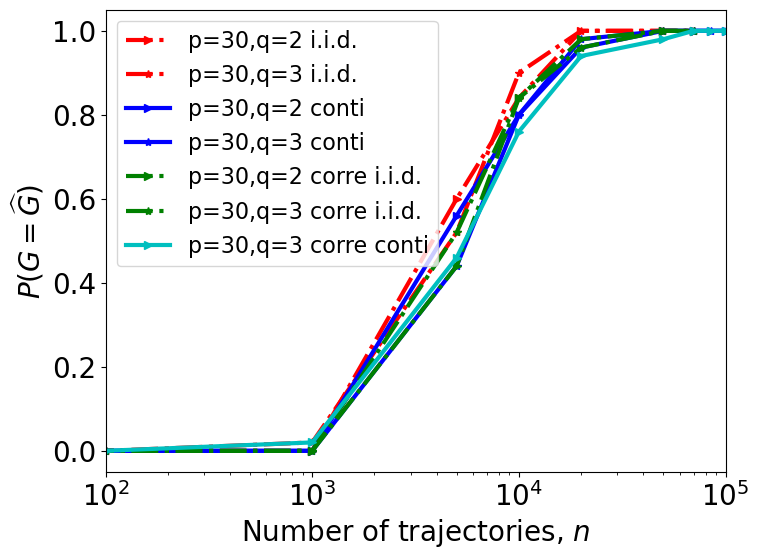

In [31]:
# FONTSIZE=20
LEGENDSIZE=16
plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.semilogx(samples[:8],prob_det_RR1,'r>-.',label="p=10,q=2 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR2,'r*-.',label="p=10,q=3 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti1,'g>-',label="p=10,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti2,'g*-.',label="p=10,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR1,'b>-.',label="p=10,q=2 corre i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR2,'b*-.',label="p=10,q=3 corre i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre1,'c>-',label="p=10,q=2 corre conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre2,'c*-',label="p=10,q=3 corre conti",linewidth=LINEWIDTH)
plt.legend(loc="upper left", fontsize=LEGENDSIZE)
plt.xlabel(r"Number of trajectories, $n$", fontsize=FONTSIZE)
plt.xlim(100,100000)
plt.ylabel(r"$P(G=\widehat{G}$)", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.savefig('comparison_plot_p=10.pdf',format='pdf')


plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.semilogx(samples[:8],prob_det_RR3,'r>-.',label="p=20,q=2 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR4,'r*-.',label="p=20,q=3 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti3,'g>-',label="p=20,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti4,'g*-',label="p=20,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre3,'b>-',label="p=20,q=2 corre conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre4,'b*-',label="p=20,q=3 corre conti",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR3,'m>-.',label="p=20,q=2 corre i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR4,'m*-.',label="p=20,q=3 corre i.i.d.",linewidth=LINEWIDTH)
plt.legend(loc="upper left", fontsize=LEGENDSIZE)
plt.xlabel(r"Number of trajectories, $n$", fontsize=FONTSIZE)
plt.xlim(100,100000)
plt.ylabel(r"$P(G=\widehat{G}$)", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.savefig('comparison_plot_p=20.pdf',format='pdf')


plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.semilogx(samples[:8],prob_det_RR5,'r>-.',label="p=30,q=2 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_RR6,'r*-.',label="p=30,q=3 i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti5,'b>-',label="p=30,q=2 conti",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_conti6,'b*-',label="p=30,q=3 conti",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR5,'g>-.',label="p=30,q=2 corre i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples[:8],prob_det_corre_RR6,'g*-.',label="p=30,q=3 corre i.i.d.",linewidth=LINEWIDTH)
plt.semilogx(samples,prob_det_corre6,'c>-',label="p=30,q=3 corre conti",linewidth=LINEWIDTH)
# plt.semilogx(samples,prob_det_corre5,'c^-',label="p=30,q=2 conti",linewidth=LINEWIDTH)
plt.legend(loc="upper left", fontsize=LEGENDSIZE)
plt.xlabel(r"Number of trajectories, $n$", fontsize=FONTSIZE)
plt.xlim(100,100000)
plt.ylabel(r"$P(G=\widehat{G}$)", fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.savefig('comparison_plot_p=30.pdf',format='pdf')

